In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [137]:
df_moron = pd.read_csv('/content/drive/MyDrive/Alkemy/GFUMMoron_process.txt', sep=',')
df_rio4 = pd.read_csv('/content/drive/MyDrive/Alkemy/GFUNRioCuarto_process.txt', sep=',')
df = pd.concat([df_moron, df_rio4], ignore_index=True, axis=0)

# Inscriptos

In [138]:
print('Inscriptos Universidad de Moron: ', df_moron.shape[0])
print('Inscriptos Universidad de Rio 4to: ', df_rio4.shape[0])

Inscriptos Universidad de Moron:  3847
Inscriptos Universidad de Rio 4to:  571


# Edad

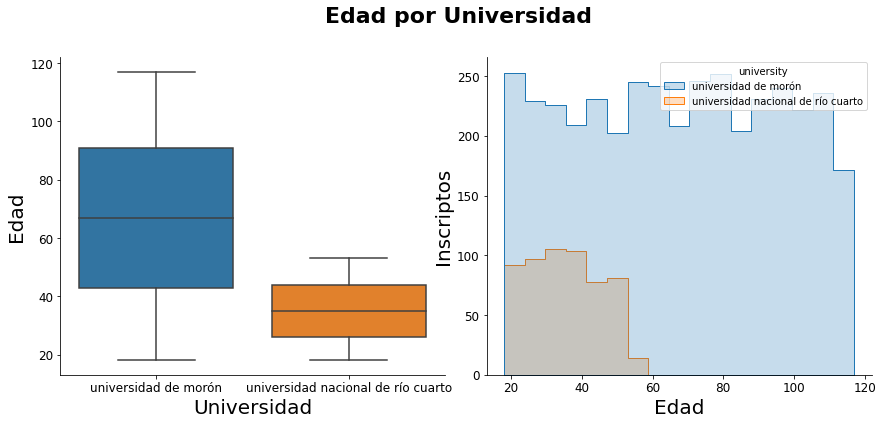

In [139]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
fig.tight_layout()

sns.boxplot(data=df, y='age', x='university', ax= ax0)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax0.set_ylabel('Edad', fontsize=20)
ax0.set_xlabel('Universidad', fontsize=20)

# hacer histograma

df.sort_values('age', inplace=True)
sns.histplot(data=df, x='age', hue='university', element='step', ax=ax1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_ylabel('Inscriptos', fontsize=20)
ax1.set_xlabel('Edad', fontsize=20)

plt.suptitle('Edad por Universidad', y=1.1, size=22, weight='bold')

plt.show()

In [140]:
#universidad de moron
pd.DataFrame(df_moron['age'].describe())

,age
count,3847.000000
mean,66.800364
std,28.438156
min,18.000000
25%,43.000000
50%,67.000000
75%,91.000000
max,117.000000


In [141]:
#universidad de rio4
pd.DataFrame(df_rio4['age'].describe())

,age
count,571.000000
mean,35.117338
std,10.230084
min,18.000000
25%,26.000000
50%,35.000000
75%,44.000000
max,53.000000


# Genero

Text(0.5, 1.1, 'Distribución de estudiantes por género')

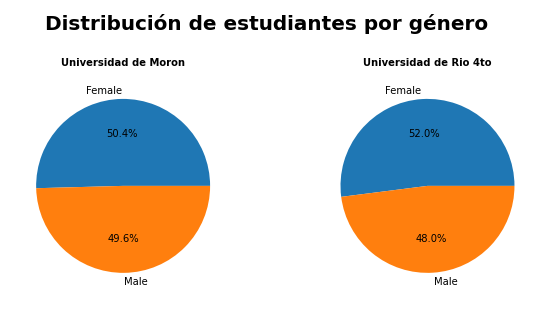

In [142]:
fig = plt.figure(figsize=(5,2),dpi=144)
ax = fig.add_subplot(121)

cts = df_moron.gender.value_counts().to_frame()
ax.set_title('Universidad de Moron', size=5, weight='bold')
ax.pie(cts.gender, labels=('Female', 'Male'), textprops={'fontsize': 5}, autopct="%1.1f%%")

ax = fig.add_subplot(122)
cts = df_rio4.gender.value_counts().to_frame()
ax.set_title('Universidad de Rio 4to', size=5, weight='bold')
ax.pie(cts.gender, labels=('Female', 'Male'), textprops={'fontsize': 5}, autopct="%1.1f%%")
plt.suptitle('Distribución de estudiantes por género', y=1.1, size=10, weight='bold')

# Carreras

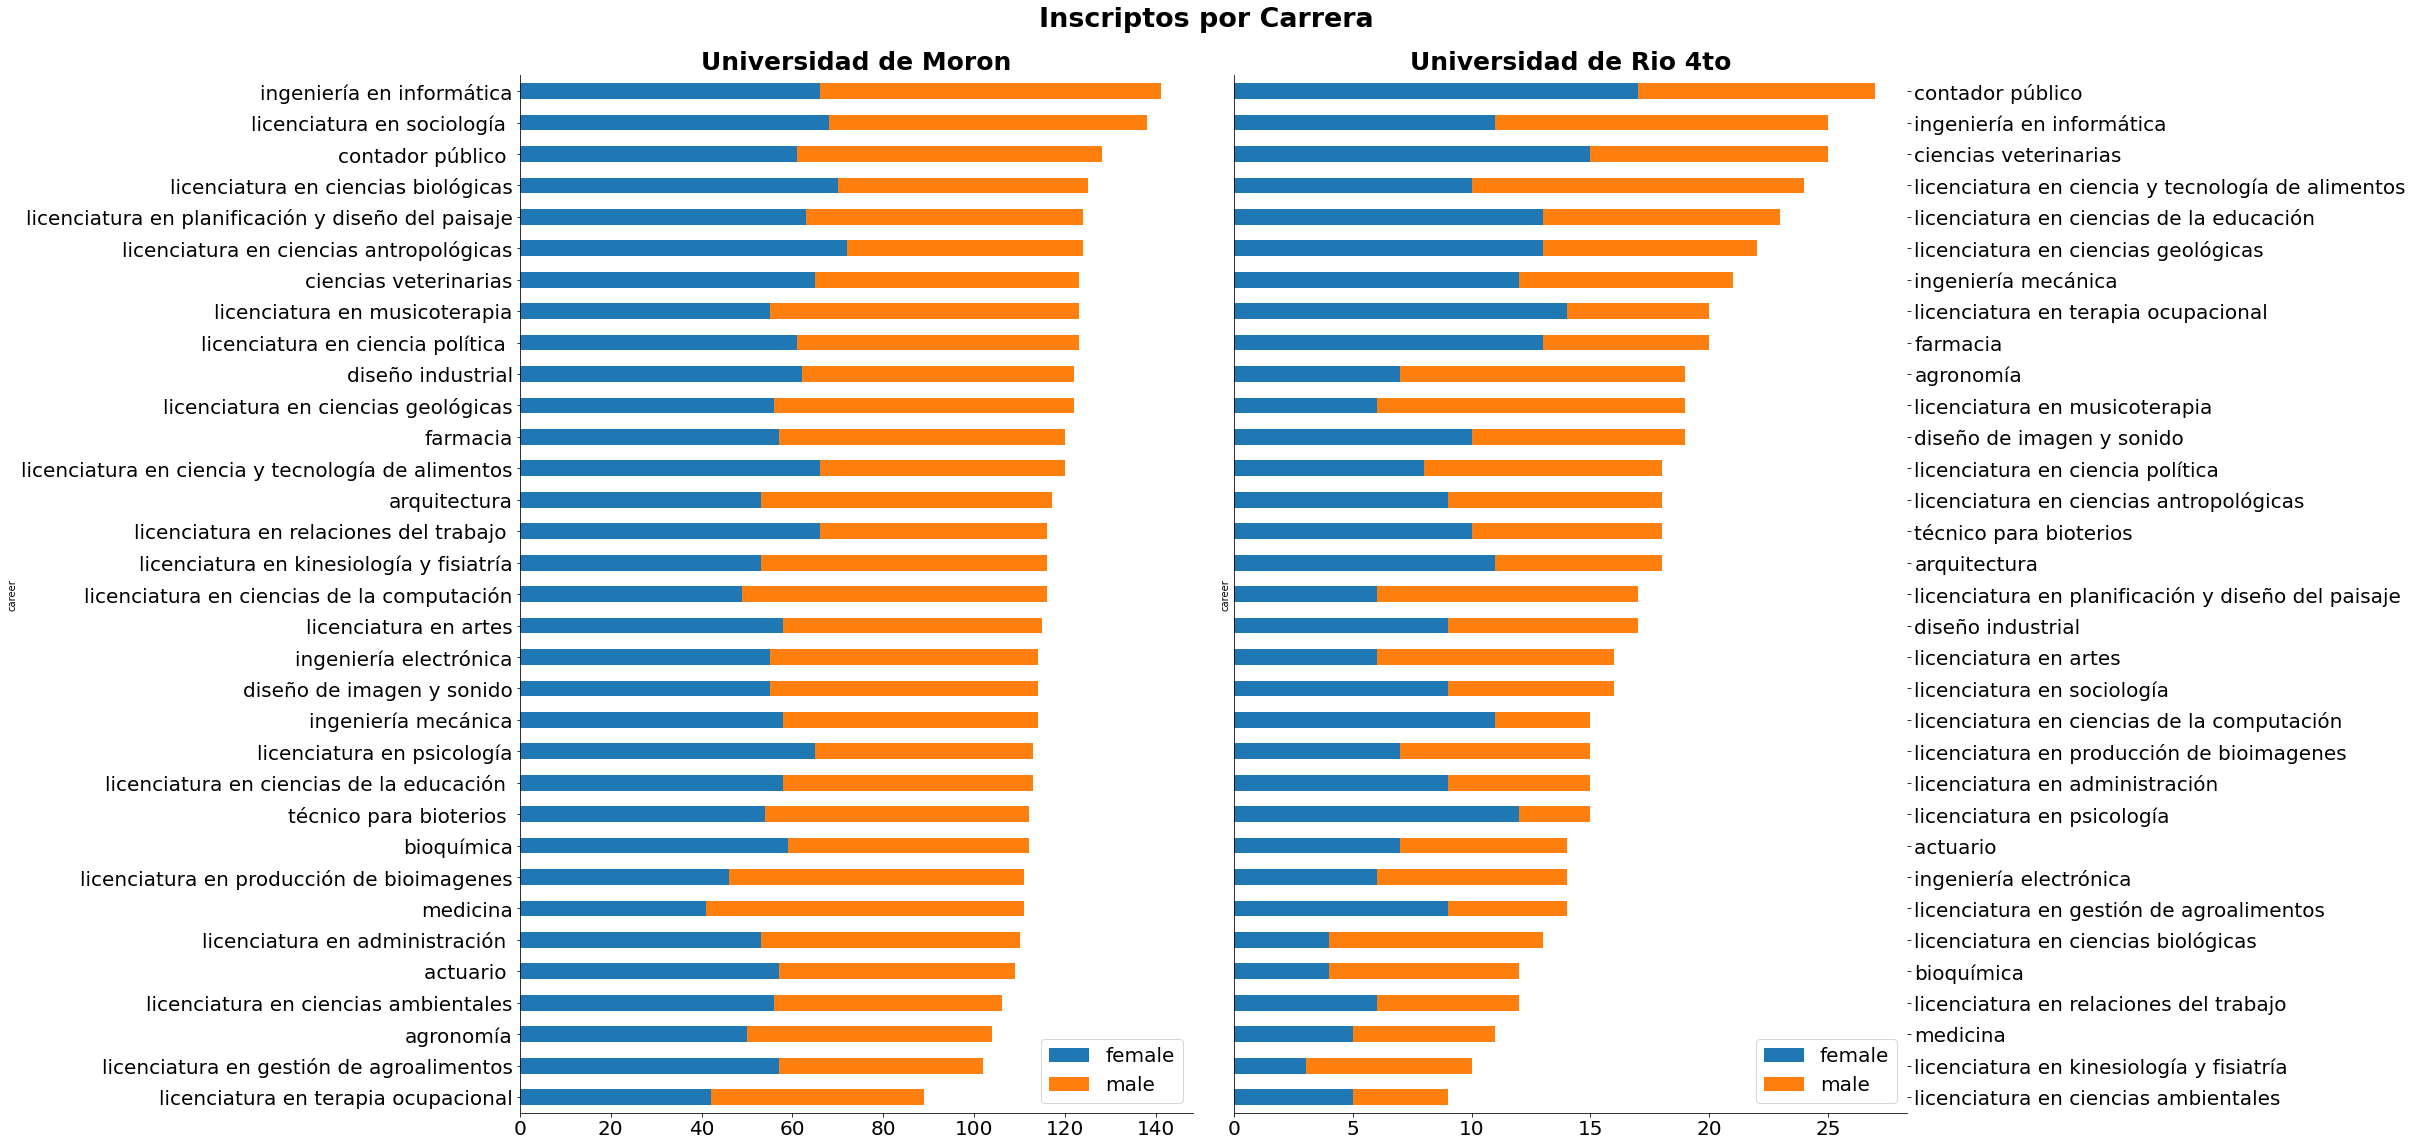

In [143]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,15))
fig.tight_layout()

df_career_gender_moron = df_moron.groupby(['gender','career']).agg(inscriptos=('last_name','count')).reset_index().pivot(columns='gender', index='career', values='inscriptos')
df_career_gender_moron['suma'] = df_career_gender_moron['female'] + df_career_gender_moron['male']
df_career_gender_moron = df_career_gender_moron.sort_values('suma', ascending=True)
df_career_gender_moron.drop(columns='suma', inplace=True)
df_career_gender_moron.plot(kind='barh', stacked=True, ax=ax0)

ax0.set_title('Universidad de Moron', fontweight='bold', fontsize=25, y=1.1)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.tick_params(axis='both', which='major', labelsize=20)
ax0.legend(prop={'size': 20})


df_career_gender_rio4 = df_rio4.groupby(['gender','career']).agg(inscriptos=('last_name','count')).reset_index().pivot(columns='gender', index='career', values='inscriptos')
df_career_gender_rio4['suma'] = df_career_gender_rio4['female'] + df_career_gender_rio4['male']
df_career_gender_rio4 = df_career_gender_rio4.sort_values('suma', ascending=True)
df_career_gender_rio4.drop(columns='suma', inplace=True)
df_career_gender_rio4.plot(kind='barh', stacked=True, ax=ax1)

ax1.set_title('Universidad de Rio 4to', fontweight='bold', fontsize=25, y=1.1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(prop={'size': 20})

plt.suptitle('Inscriptos por Carrera', y=1.05, size=27, weight='bold')


plt.show()

In [144]:
carr_moron = pd.pivot_table(df_moron,
               values= 'last_name',
               index=['career', 'gender'],
               aggfunc='count'
               ).unstack('gender').reset_index().droplevel('gender', axis=1)
               
carr_moron.columns = ['career', 'female', 'male']
carr_moron['Total'] = carr_moron['female'] + carr_moron['male']
carr_moron.sort_values('Total', ascending=False)

,career,female,male,Total
10,ingeniería en informática,66,75,141
29,licenciatura en sociología,68,70,138
5,contador público,61,67,128
18,licenciatura en ciencias biológicas,70,55,125
17,licenciatura en ciencias antropológicas,72,52,124
25,licenciatura en planificación y diseño del pai...,63,61,124
14,licenciatura en ciencia política,61,62,123
4,ciencias veterinarias,65,58,123
24,licenciatura en musicoterapia,55,68,123
7,diseño industrial,62,60,122


In [145]:
carr_rio4 = pd.pivot_table(df_rio4,
               values= 'last_name',
               index=['career', 'gender'],
               aggfunc='count'
               ).unstack('gender').reset_index().droplevel('gender', axis=1)
               
carr_rio4.columns = ['career', 'female', 'male']
carr_rio4['Total'] = carr_rio4['female'] + carr_rio4['male']
carr_rio4.sort_values('Total', ascending=False)

,career,female,male,Total
5,contador público,17,10,27
4,ciencias veterinarias,15,10,25
10,ingeniería en informática,11,14,25
15,licenciatura en ciencia y tecnología de alimentos,10,14,24
20,licenciatura en ciencias de la educación,13,10,23
21,licenciatura en ciencias geológicas,13,9,22
11,ingeniería mecánica,12,9,21
30,licenciatura en terapia ocupacional,14,6,20
8,farmacia,13,7,20
1,agronomía,7,12,19


# Localidad

In [146]:
#universidad de moron
pd.DataFrame(df_moron['location'].value_counts().describe())

,location
count,1323.000000
mean,2.907785
std,1.832789
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,23.000000


In [147]:
df_loc_moron = df_moron['location'].value_counts()
df_loc_moron.head(3)

9 de julio       23
agua colorada    20
25 de mayo       17
Name: location, dtype: int64

In [148]:
df_loc_moron.tail(3)

el cipres          1
la buana moza      1
saladillo norte    1
Name: location, dtype: int64

In [149]:
#universidad de rio 4
pd.DataFrame(df_rio4['location'].value_counts().describe())

,location
count,471.000000
mean,1.212314
std,0.481064
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [150]:
df_loc_rio4 = df_rio4['location'].value_counts()
df_loc_rio4.head(3)

bosques          4
campo caretto    3
cholila          3
Name: location, dtype: int64

In [151]:
df_loc_rio4.tail(3)

arenaza               1
barrio villa adela    1
maori                 1
Name: location, dtype: int64

# Conclusiones
  Analisis de las universidades del Grupo F, Universidad de Moron y la Universidad de Rio Cuarto para gente inscripta entre el 2020-09-01 y 2021-02-01.




*   Inscriptos Universidad de Moron:   3847

*   Inscriptos Universidad de Rio 4to:  571




## Edad
  Se filtraron previamente las edades menores a 18 años y no se puso un techo en el limite de edad para mantener registros historicos. Esto hizo que la edad media de valores incongruentes como la media de 66 años en la Universidad de Moron.

En la Universidad de Rio 4to las edades estan mas compactadas, variando entre 18 y 53 años. En cambio en la Universidad de Moron los registros van desde los 18 hasta los 117

##Genero
Ambas universidades estan bastante equilibradas en cuanto a su distribucion de inscriptos por genero.


---

*Universidad de Moron*

*   Male: 49,6%
*   Female: 50,4%


---

*Universidad de Rio Cuarto*

*   Male: 48.0%
*   Female: 52.0%





## Carreras
***Universidad de Moron***


---


*Mayor cantidad de inscriptos:*

- ingeniería en informática
*   Female: 66
*   Male: 75
*   Total: 141


*Menor cantidad de inscriptos:*

- licenciatura en terapia ocupacional
*   Female: 42
*   Male: 47
*   Total: 89


---

---

---
***Universidad de Moron***


---


*Mayor cantidad de inscriptos:*

- contador público
*   Female: 17
*   Male: 10
*   Total: 27


*Menor cantidad de inscriptos:*

- licenciatura en ciencias ambientales
*   Female: 5
*   Male: 4
*   Total: 9








## Localidad
  La cantidad de inscriptos por localidad en la **Univerisdad de Rio 4to** es muy baja. Los datos muestran que el 75% de localidades tiene solo 1 inscriptor registrado en ella.
  Estos son sus maximos registros por localidad:

*   bosques: 4
*   campo caretto: 3
*   cholila: 3


---

En la **Universidad de Moron** muestra mas registros por localidad y quizas se podria llegar a la conclusion de que estas son sus localidades mas cercanas:

*   9 de julio: 23
*   agua colorada: 20
*   25 de mayo: 17
  